# Session 3: Visualizing Victory – Graphs and Diagrams

## 1. Concepts Covered
- Using Python for data visualization
- Histograms, bar charts, and scatter plots
- matplotlib and seaborn libraries
- Exploring patterns in baseball stats

## 2. Python Code Walkthrough
We'll use the `pybaseball` package to get MLB data and create some charts.

In [1]:
from pybaseball import batting_stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data for the 2022 season
batting = batting_stats(2022)
batting.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,0.305,0.706,0.463,11.4
6,9777,2022,Nolan Arenado,STL,31,148,557,620,163,90,...,111.4,190,0.389,489,0.155,0.241,0.266,0.445,0.339,7.1
5,11493,2022,Manny Machado,SDP,29,150,578,644,172,102,...,112.4,219,0.490,447,0.126,0.243,0.264,0.447,0.338,7.4
3,5417,2022,Jose Altuve,HOU,32,141,527,604,158,91,...,109.8,130,0.295,441,0.173,0.240,0.269,0.440,0.354,6.6
2,9218,2022,Paul Goldschmidt,STL,34,151,561,651,178,102,...,112.3,200,0.469,426,0.196,0.295,0.261,0.482,0.367,7.0


### Histogram: Home Runs

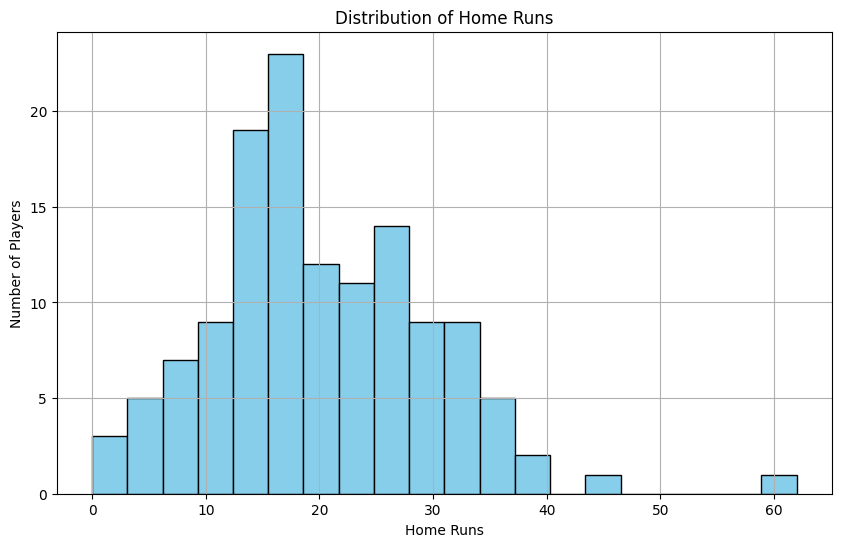

In [2]:
plt.figure(figsize=(10,6))
plt.hist(batting['HR'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

### Bar Chart: Top 10 Players by Stolen Bases

/tmp/ipykernel_757/3591360115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SB', y='Name', data=top_sb, palette='viridis')


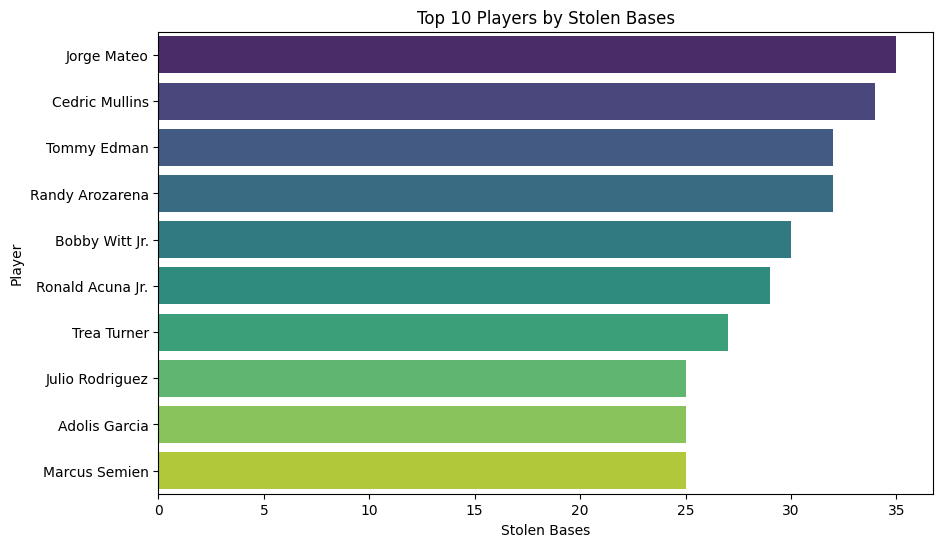

In [3]:
top_sb = batting.sort_values('SB', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='SB', y='Name', data=top_sb, palette='viridis')
plt.title('Top 10 Players by Stolen Bases')
plt.xlabel('Stolen Bases')
plt.ylabel('Player')
plt.show()

### Scatter Plot: Batting Average vs. Home Runs

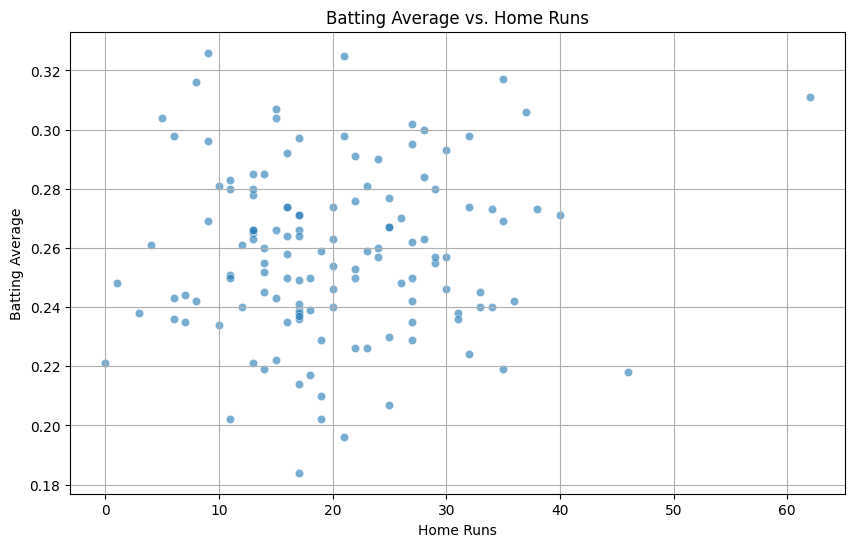

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='HR', y='AVG', data=batting, alpha=0.6)
plt.title('Batting Average vs. Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Batting Average')
plt.grid(True)
plt.show()

## 3. Activity & Exploring Questions
- Use your visualizations to answer the following:
    - 📊 Is there a correlation between batting average and home runs?
    - 🔍 Who stands out in the scatter plot? Why?
    - 📉 What does the histogram tell you about home run distribution?

**Hints**:
- Try filtering the data using `.sort_values()`
- Look at the shape of the histogram – is it skewed?
- Identify players who are far from the cluster in scatter plots.

In [5]:
from scipy.stats import pearsonr

print('Correlation Between HR and AVG')
corr, p_value = pearsonr(batting['HR'], batting['AVG'])
print(corr)
print(p_value)

print('Players that have high AVG and HR Numbers')
display(batting[(batting['HR'] > 60) & (batting['AVG'] > .3)][['Name', 'Team', 'HR', 'AVG']])

print('Players with high AVG Values')
display(batting[(batting['HR'] >= 40)][['Name', 'Team', 'HR', 'AVG']])

Correlation Between HR and AVG
0.07605350857972196
0.3897808556816869
Players that have high AVG and HR Numbers


,Name,Team,HR,AVG
0,Aaron Judge,NYY,62,0.311


Players with high AVG Values


,Name,Team,HR,AVG
0,Aaron Judge,NYY,62,0.311
15,Pete Alonso,NYM,40,0.271
25,Kyle Schwarber,PHI,46,0.218


## 4. Extensions
- Create a scatter plot comparing `SO` (strikeouts) and `HR`.
- Make a bar chart showing OBP (on-base percentage) for top 10 players.

In [6]:
print('Correlation Between HR and SO')
corr, p_value = pearsonr(batting['HR'], batting['SO'])
print(corr)
print(p_value)

Correlation Between HR and SO
0.537293906649526
4.378966122900442e-11


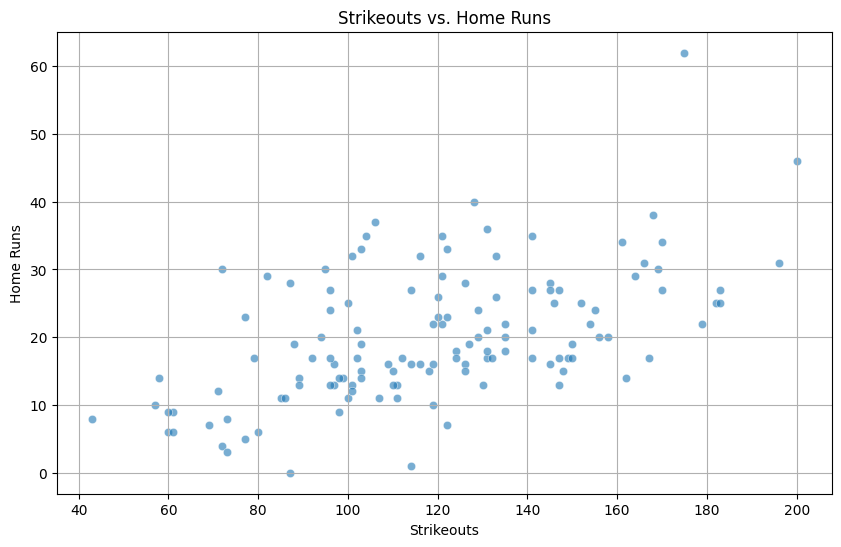

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SO', y='HR', data=batting, alpha=0.6)
plt.title('Strikeouts vs. Home Runs')
plt.xlabel('Strikeouts')
plt.ylabel('Home Runs')
plt.grid(True)
plt.show()

/tmp/ipykernel_757/1421928026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OBP', y='Name', data=top_sb, palette='viridis')


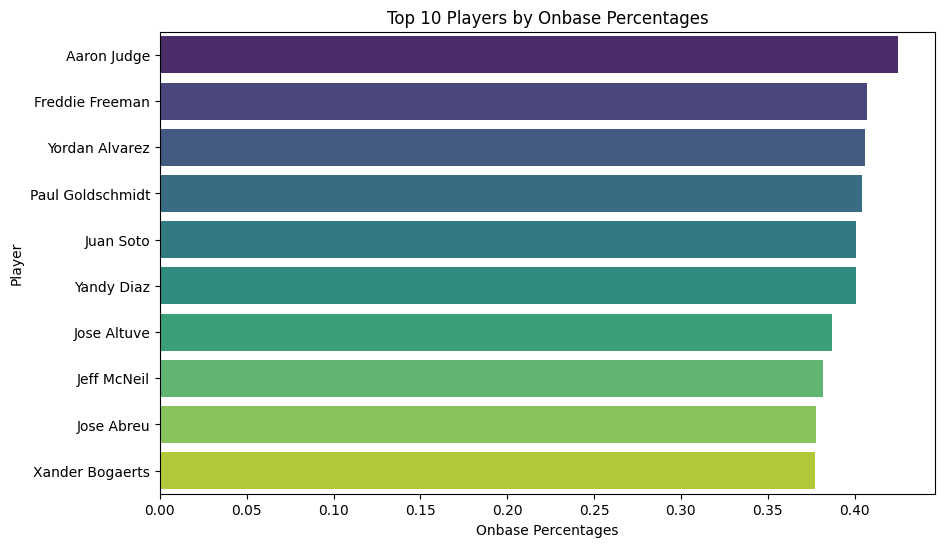

In [8]:
top_sb = batting.sort_values('OBP', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='OBP', y='Name', data=top_sb, palette='viridis')
plt.title('Top 10 Players by Onbase Percentages')
plt.xlabel('Onbase Percentages')
plt.ylabel('Player')
plt.show()

## 5. Helpful Links
- [pybaseball GitHub](https://github.com/jldbc/pybaseball)
- [Matplotlib Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [Seaborn Docs](https://seaborn.pydata.org/)
- [Khan Academy: Statistics](https://www.khanacademy.org/math/statistics-probability)